## This notebook reproduces the main results of Sections 2, 3 and 4 in the paper ''AdS$_3\times$S$^3$ magnons in the symmetric orbifold" by Matthias R. Gaberdiel, Dennis Kempel, and Beat Nairz. 

## We first introduce the necessary functions. At the end of the notebook we plot the results.



In [1]:
from numpy import exp, pi, sqrt, conjugate, real, zeros, sign, array
from numpy.linalg import eigh, norm
from scipy.special import binom
import matplotlib.pyplot as plt

<hr style="border:2px solid gray">

###### Here we collect the necessary Wick contractions.



The fermion-boson crossed contraction, eq. (A.13).

In [2]:
def FB(w,m,n):
    
    ##############
    if m%(w+1)==0:
        if m==w+1:
            val = 1
        else:
            return 0
    else:
        val = binom(-m/(w+1),w+1-m)
    ##############
        
    
    ##############
    if n%w==0:
        if n!=w:
            k=n/w
            val *= (-1)**(w*(1-k))*binom(w*(1-k)-k,-k)
        
    else:
        val *= binom(-1+n/w,w-n)
    ##############
    
    val *= exp(-1j*pi*m/(w+1)) * (w+1)**(n/w)
    val *= w**(1-m/(w+1)) * (-w/(w+1))**(m-n-1)
    val *= sqrt(1-n/w)
    
    return val


The negative fermion same-species contraction, eq. (A.16-17)

In [3]:
def FF(w,m,n):
    if w*m == (w+1)*n:
        if n==w:
            return sqrt((w+1)/w)
        else:
            return sqrt(w/(w+1))
    
    ##############
    if m%(w+1)==0:
        if m==w+1:
            val = 1
        else:
            return 0
    else:
        val = binom(-m/(w+1),w+1-m)
    ##############
        
    
    ##############
    if n%w==0:
        if n!=w:
            k=n/w
            val *= (-1)**(w*(1-k))*binom(w*(1-k)-k,-k)
        
    else:
        val *= binom(-1+n/w,w-n)
    ##############
    
    val *= -exp(-1j*pi*m/(w+1)) * (w+1)**(-.5+n/w)
    val *= w**(.5-m/(w+1)) * (-w/(w+1))**(m-n-1)
    val *= (1-n/w) / (m/(w+1)-n/w)
    
    return val

The boson-fermion crossed contraction, eq. (A.14).

In [4]:
BF = lambda w,m,n: sqrt((1-m/(w+1))/(1-n/w)) * FB(w,m,n)


The positive fermion same-species contraction, eq. (A.18).

In [5]:
FFPlus = lambda w,m,n: (1-m/(w+1))/(1-n/w) * FF(w,m,n)


The boson same-species contraction which appears in the weighting functions in eq. (A.20-21).

In [6]:
BB = lambda w,m,n: sqrt((1-m/(w+1))/(1-n/w)) * FF(w,m,n)


<hr style="border:2px solid gray">

###### The matrix elements of the negative two-fermion sector, Section 2.


Matrix of transition amplitudes $\kappa$ in eq. (2.16) for fixed mode numbers $m$ and $n$.

In [7]:
def kappa2_minus(w,m,n):
    kappa = []
    
    for c in range(m+1,w):
        row = []
        
        for b in range(n,w+1):
            #Explicit transition amplitude, see bottom of page 6.
            row.append(FB(w-1,b,w-1+m-c) * FF(w-1,w+n-b,c))
            
        kappa.append(row)
    
    return conjugate(array(kappa))

Matrix of transition amplitudes $\bar\kappa$ in eq. (2.16).

In [8]:
def bkappa2_minus(w,m,n):
    bkappa = []
    
    for c in range(m+1,w):
        row = []
        
        for b in range(n,w+1):
            #Explicit transition amplitude, see bottom of page 6.
            row.append(FB(w-1,w+n-b,w-1+m-c) * FF(w-1,b,c))
            
        bkappa.append(row)
    
    return conjugate(array(bkappa))

The full matrix $\gamma(\frac{n}{w})$, eq. (2.17).

In [9]:
def gamma2_minus(w,n):
    gamma = zeros((w+1-n,w+1-n),dtype=float)
    
    for m in range(-w+2,w-1):
        kappa = kappa2_minus(w,m,n)
        bkappa = bkappa2_minus(w,m,n)
        
        #The weighting function |delta^(w)(m;n)|^2, eq. (A.20)
        delta2 = abs(BB(w-1,-n,-m))**2 
        
        gamma += real(conjugate(kappa.T) @ kappa * delta2)
        gamma += real(conjugate(bkappa.T) @ bkappa * delta2)
    
    return gamma * (pi * (w-1)/w)**2

<hr style="border:2px solid gray">

###### The analogous matrices for the positive two-fermion sector, Section 3.1.


See eq. (3.5).

In [10]:
def kappa2_plus(w,m,n):
    kappa = []
    
    for c in range(m+1,w+1):
        row = []
        
        for b in range(n+1,w):
            #See eq. (3.6).
            row.append(BF(w,w+1+m-c,b) * FFPlus(w,c,w+n-b))
            
        kappa.append(row)
    
    return array(kappa)

See eq. (3.5).

In [11]:
def bkappa2_plus(w,m,n):
    bkappa = []
    
    for c in range(m+1,w+1):
        row = []
        
        for b in range(n+1,w):
            #See eq. (3.6).
            row.append(BF(w,w+1+m-c,w+n-b) * FFPlus(w,c,b))
            
        bkappa.append(row)
    
    return array(bkappa)

See eq. (3.8).

In [12]:
def gamma2_plus(w,n):
    gamma = zeros((w-1-n,w-1-n),dtype=float)
    
    for m in range(-w,w+1):
        kappa = kappa2_plus(w,m,n)
        bkappa = bkappa2_plus(w,m,n)
        
        #See eq. (A.21).
        delta2 = abs(BB(w,m,n))**2 
        
        gamma += real(conjugate(kappa.T) @ kappa * delta2)
        gamma += real(conjugate(bkappa.T) @ bkappa * delta2)
    
    return gamma * (pi * w/(w+1))**2

<hr style="border:2px solid gray">

###### The matrix elements of the negative three-fermion sector.


We impose $a > w-n$ to select one of the identical basis states $(n,a)$ and $(w-a,w-n)$, see eq. (4.1).



Matrix of transition amplitudes $\kappa$ in eq. (4.2).

In [13]:
def kappa3_minus(w):
    kappa = []
    
    for l in range(0,w-1):
        for c in range(0,w-1-l):
            row = []
            
            for n in range(1,w+1):
                for a in range(max(n,w+1-n),w+1):
                    
                    #Explicit transition amplitude, see eq. (4.3).
                    term1 = FB(w-1,a,l+c)*FF(w-1,w-n,w-1-l)
                    term2 = FB(w-1,w-n,l+c)*FF(w-1,a,w-1-l)
                    
                    row.append(FF(w-1,w+n-a,w-1-c)*(term1-term2))
            
            kappa.append(row)
    
    return conjugate(array(kappa))

Matrix of transition amplitudes $\bar\kappa$ in eq. (4.2).

In [14]:
def bkappa3_minus(w):
    bkappa = []
    
    for l in range(0,int((w-3)/2)+1):
        for c in range(l+1,w-1-l):
            row = []
            
            for n in range(1,w+1):
                for a in range(max(n,w+1-n),w+1):
                    
                    term1 = FF(w-1,w-n,w-1-c)*FF(w-1,a,w-1-l)
                    term2 = FF(w-1,a,w-1-c)*FF(w-1,w-n,w-1-l)
                    
                    row.append(FB(w-1,w+n-a,l+c)*(term1-term2))
            
            bkappa.append(row)
    
    return conjugate(array(bkappa))

Full matrix $\gamma$, eq. (4.4).

In [15]:
def gamma3_minus(w):
    kappa = kappa3_minus(w)
    bkappa = bkappa3_minus(w)
    
    gamma = real(conjugate(kappa.T) @ kappa + conjugate(bkappa.T) @ bkappa)
    
    return (pi * (w-1)/w)**2 * gamma

<hr style="border:2px solid gray">

###### The matrix elements of the positive three-fermion sector.


In [16]:
def kappa3_plus(w):
    kappa = []
    
    for l in range(1,w):
        for c in range(1,w+1-l):
            row = []
            
            for n in range(2,w):
                for a in range(max(n+1,w+1-n),w):
                    
                    term1 = BF(w,l+c,a)*FFPlus(w,w+1-l,w-n)
                    term2 = BF(w,l+c,w-n)*FFPlus(w,w+1-l,a)
                    
                    row.append(FFPlus(w,w+1-c,w+n-a)*(term1-term2))
            
            kappa.append(row)
    
    return array(kappa)

def bkappa3_plus(w):
    bkappa = []
    
    for l in range(1,int((w-1)/2)+1):
        for c in range(l+1,w+1-l):
            row = []
            
            for n in range(2,w):
                for a in range(max(n+1,w+1-n),w):
                    
                    term1 = FFPlus(w,w+1-c,w-n)*FFPlus(w,w+1-l,a)
                    term2 = FFPlus(w,w+1-c,a)*FFPlus(w,w+1-l,w-n)
                    
                    row.append(BF(w,l+c,w+n-a)*(term1-term2))
            
            bkappa.append(row)
    
    return array(bkappa)

def gamma3_plus(w):
    kappa = kappa3_plus(w)
    bkappa = bkappa3_plus(w)
    
    gamma = real(conjugate(kappa.T) @ kappa + conjugate(bkappa.T) @ bkappa)
    
    return (pi * w/(w+1))**2 * gamma

<hr style="border:2px solid gray">

###### Some auxilliary functions for the three-magnon calculation.


This function collects the coefficients associated with the internal momentum label $n$ of a general state $\lvert f \rangle$ expanded in the negative basis states in eq. (4.1), see e.g. eq. (4.6).

In [17]:
def fixed_momentum_minus(w,n,f):
    fn = []

    #Determine the indices of |f> associated with n <= a <= w.
    for a in range(n,w+1):
        
        #The basis state (w-n,w-n) vanishes.
        if a == w-n:
            fn.append(0)
        else:
            #Impose a > w-n.
            if max(n,w+1-n) <= a:
                n2 = n
                a2 = a
                sg = +1
                
            #Permute the two \psi^- modes if a > w-n does not hold.
            else:
                n2 = w-a
                a2 = w-n
                
                #Phase from permuting two fermions.
                sg = -1
                
            #Sum over the for-loop in e.g. lines 261-262 to determine the index
            #associated with (n2,a2).
            if n2 <= int((w+1)/2):
                S = 0.5*n2*(n2-1)
                ind = int(S + a2-w-1+n2)
            else:
                if w%2 == 0:
                    S = 0.25 * (-2*n2**2 - (w+2)**2 + n2*(6+4*w))
                else:
                    S = 0.25 * (-2*n2**2 - (w+1)*(w+3) + n2*(6+4*w))
                
                ind = int(S + a2-n2)
            
            fn.append(sg * f[int(ind)])
    
    return fn

The analogous function for the positive sector.

In [18]:
def fixed_momentum_plus(w,n,f):
    fn = []
    
    for a in range(n+1,w):
        if a == w-n:
            fn.append(0)
        else:
            if max(n+1,w+1-n) <= a:
                n2 = n
                a2 = a
                sg = +1
                
            else:
                n2 = w-a
                a2 = w-n
                sg = -1
                
            if n2 <= int(w/2):
                S = 0.5*(n2-1)*(n2-2)
                ind = int(S + a2-w-1+n2)
            else:
                if w%2 == 0:
                    S = 0.25 * (4 - 2*n2**2 - (w+2)*w + n2*(-2+4*w))
                else:
                    S = 0.25 * (3-2*n2*(n2+1) - 2*w + 4*n2*w - w**2)
                
                ind = int(S + a2-n2-1)
            
            fn.append(sg * f[int(ind)])
    
    return fn

<hr style="border:2px solid gray">
<hr style="border:2px solid gray">
<hr style="border:2px solid gray">


###### Here we reproduce Figures 1 and 5, and plot the long eigenstate in the negative sector.

We begin with the negative sector.

Set $w$ and $n$.

In [19]:
W = 50
N = 3

Calculate the matrix $\gamma(\frac{n}{w})$.

In [20]:
g2m = gamma2_minus(W,N)

The sorted eigenvalues and eigenvectors of $\gamma(\frac{n}{w})$.

In [21]:
e2m, v2m = eigh(g2m)

The coefficients $\xi(\frac{n}{w};\frac{a}{w})$ of the long eigenstate $\Xi^-_{\frac{n}{w}}\lvert w \rangle$.

For $n>0$ the long eigenstate is always the eigenstate with minimal eigenvalue.
For $n\leq 0$ this is not necessarily the case. 

In [22]:
xi = v2m[:,0].copy()

Normalize the coefficients $\xi(\frac{n}{w};\frac{a}{w})$ according to eq. (2.21).

In [23]:
xi = xi/norm(xi) * sqrt(W+1-N) * sign(xi[1])

Plot the coefficients $\xi(\frac{n}{w};\frac{a}{w})$.

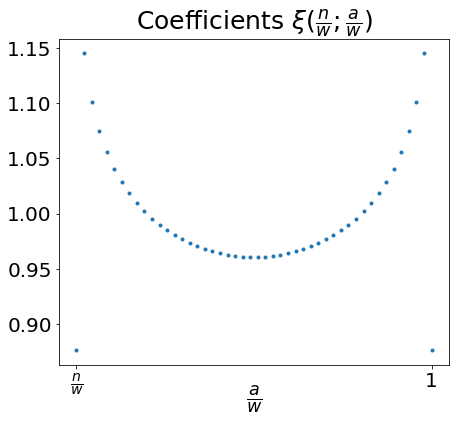

In [24]:
plt.figure(figsize=(7,6))
plt.title(r"Coefficients $\xi(\frac{n}{w};\frac{a}{w})$",fontsize=25)
plt.plot(range(N,W+1),xi,'.')
plt.xticks([N,W],[r"$\frac{n}{w}$",1],fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r"$\frac{a}{w}$",fontsize=25,labelpad=-15)
plt.show()

Prepare the eigenvectors for the heat map.

In [25]:
for a in range(W+1-N):
    v2m[:,a] = abs(v2m[:,a])
    v2m[:,a] /= max(v2m[:,a])

Plot the heat map of the negative sector

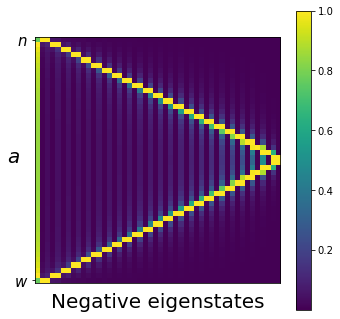

In [26]:
plt.figure(figsize=(5.5,5.5))
plt.imshow(v2m)
plt.xticks([])
plt.yticks([0,W-N],[r"$n$",r"$w$"],fontsize=15)
plt.xlabel("Negative eigenstates", fontsize=20,labelpad=10,loc="center")
plt.ylabel(r"$a$",rotation=0, fontsize=20, labelpad=0, position=(0,0.475))
plt.colorbar()
plt.show()

Now the analogous calculation in the positive sector. 

Calculate the matrix $\hat\gamma(\frac{n}{w})$.

In [27]:
g2p = gamma2_plus(W,N)

The sorted eigenvalues and eigenvectors of $\hat\gamma(\frac{n}{w})$.

In [28]:
e2p, v2p = eigh(g2p)

Prepare the eigenvectors for the heat map.

In [29]:
for a in range(W-1-N):
    v2p[:,a] = abs(v2p[:,a])
    v2p[:,a] /= max(v2p[:,a])

Plot the heat map of the positive sector.

In [30]:
plt.figure(figsize=(5.5,5.5))
plt.imshow(v2p)
plt.xticks([])
plt.yticks([0,W-2-N],[r"$n+1$",r"$w-1$"],fontsize=15)
plt.xlabel("Positive eigenstates", fontsize=20,labelpad=10,loc="center")
plt.ylabel(r"$a$",rotation=0, fontsize=20, labelpad=0, position=(0,0.475))
plt.colorbar()
plt.show()

<hr style="border:2px solid gray">


###### Here we reproduce Figure 11. We begin with the left panel (negative three-fermion spectrum).


Set $w$ for the three-fermion calculation.

In [31]:
W=30

The matrix $\gamma$.


In [32]:
g3m = gamma3_minus(W)

Sorted eigenvalues and eigenvectors of $\gamma$.

In [33]:
e3m,v3m = eigh(g3m)

Choose the range of fixed internal momenta $n$ to plot.

Required: $0 \leq n_{\text{min}} \leq n_{\text{max}} \leq w$.

In [34]:
Nmin_m = 0
Nmax_m = 5

Choose the range of eigenvectors to plot.

In [35]:
j_min_m = 0
j_max_m = 49

Create and plot the negative sector heat map.

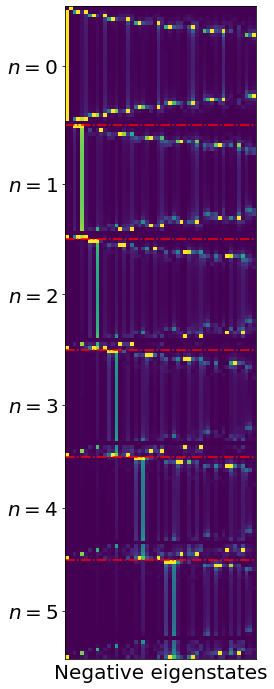

In [36]:
v3m_fixed = []
Npos_m=[]
Nticks_m=[]

plt.figure(figsize=(6,12))

for j in range(j_min_m, j_max_m+1):
    
    #Prepare the j-th eigenvector.
    v = abs(v3m[:,j].copy())
    v /= max(v)
    
    #In v_fixed we collect the projections of the eigenvector v with fixed momenta N.
    v_fixed = []
    
    for N in range(Nmin_m, Nmax_m+1):
        
        vn = fixed_momentum_minus(W,N,v)
        v_fixed.extend(vn)
        
        if j==j_min_m:
            
            Nticks_m.append(r"$n={}$".format(N))
            Npos_m.append(int(len(v_fixed)-0.5*len(vn)))
            
            if N < Nmax_m:
                plt.axhline(y=len(v_fixed)-0.5,c="r",ls="-.")
    
    v3m_fixed.append(list(abs(array(v_fixed))))

v3m_fixed = array(v3m_fixed).T

plt.imshow(v3m_fixed)
plt.yticks(Npos_m,Nticks_m,fontsize=20)
plt.xticks([])
plt.xlabel("Negative eigenstates", fontsize=20)
plt.show()

###### Next, the right panel of Figure 11 (positive three-fermion spectrum).


The matrix $\hat\gamma$.

In [37]:
g3p = gamma3_plus(W)

Sorted eigenvalues and eigenvectors of $\hat\gamma$.

In [38]:
e3p,v3p = eigh(g3p)

Choose the range of fixed internal momenta $n$ to plot.

Required: $1 \leq n_{\text{min}} \leq n_{\text{max}} \leq w-1$.

In [39]:
Nmin_p = 1
Nmax_p = 5

Choose the range of eigenvectors to plot.

In [40]:
j_min_p = 0
j_max_p = 49

Create and plot the positive sector heat map.

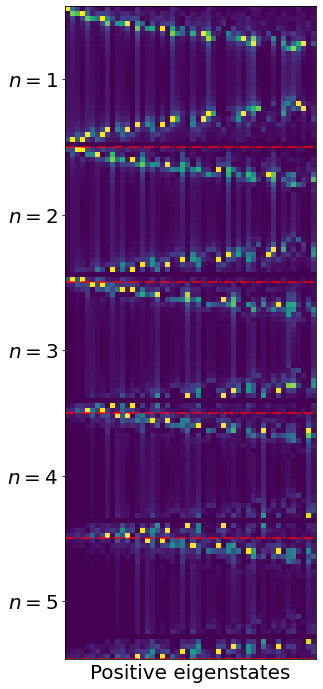

In [41]:
v3p_fixed = []
Npos_p=[]
Nticks_p=[]

plt.figure(figsize=(6,12))

for j in range(j_min_p, j_max_p+1):
    
    v = abs(v3p[:,j].copy())
    v /= max(v)
    v_fixed = []
    
    for N in range(Nmin_p, Nmax_p+1):
        vn = fixed_momentum_plus(W,N,v)
        v_fixed.extend(vn)
        
        if j==j_min_p:
            
            Nticks_p.append(r"$n={}$".format(N))
            Npos_p.append(int(len(v_fixed)-0.5*len(vn)))
            plt.axhline(y=len(v_fixed)-0.5,c="r",ls="-.")
    
    v3p_fixed.append(list(abs(array(v_fixed))))

v3p_fixed = array(v3p_fixed).T

plt.imshow(v3p_fixed)
plt.yticks(Npos_p,Nticks_p,fontsize=20)
plt.xticks([])
plt.xlabel("Positive eigenstates", fontsize=20)
plt.show()